<a href="https://colab.research.google.com/github/shwets1503/Mental-Health-in-Tech-Industry/blob/master/Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health in Tech Industry**

---



Importing Libraries

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import MinMaxScaler # for scaling

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.graph_objects as go

import matplotlib.style as style 
style.use('seaborn-poster') #sets the size of the charts
style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **3. Data Preparation (contd.)**

In [0]:
# Reading cleaned dataset from previous notebook
data = pd.read_csv('/content/clean_data.csv')

## 3.2 Visualizations

### 3.2.1 How Often does Employer Provides Mental Health Benefits?

In [0]:
data.benefits.value_counts()

Yes           473
Don't know    408
No            372
Name: benefits, dtype: int64

In [0]:
colors = ['gold', 'mediumturquoise', 'darkorange']

labels = ["Yes","Don't know","No"]
values = [477, 408, 374]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
fig.update_traces(title='Does your employer provides mental health benefits?', hoverinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

Based on this pie chart most of the employers provide benefits for mental health. It can also be noticed that large percentage of employers are not even aware whether their company provides benefits or not.

### 3.2.2 Does Employer Talks About Employee Wellness Program?

In [0]:
data.wellness_program.value_counts()

No            839
Yes           227
Don't know    187
Name: wellness_program, dtype: int64

In [0]:
import plotly.graph_objects as go

colors = ['lightgreen', 'yellow', 'red']

labels = ["Yes","Don't know","No"]
values = [229, 188, 842]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent')])
fig.update_traces(title='Has your employer ever discussed mental health as part of an employee wellness program??', hoverinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

This chart depicts that large percentage of employers don't even discuss mental health as part of an employee wellness program.

### 3.2.3 With whom does Employee Shares Mental Health Related Issues?

In [0]:
data.mental_health_interview.value_counts()

No       1005
Maybe     207
Yes        41
Name: mental_health_interview, dtype: int64

In [0]:
data.supervisor.value_counts()

Yes             513
No              390
Some of them    350
Name: supervisor, dtype: int64

In [0]:
data.coworkers.value_counts()

Some of them    772
No              258
Yes             223
Name: coworkers, dtype: int64

In [0]:
import plotly.graph_objects as go
answer=['Yes', 'No', 'Maybe']
answer2=['Yes', "No", 'Some of them']

fig = go.Figure(data=[
    go.Bar(name='Employer', x=answer, y=[44, 1008, 207]),
    go.Bar(name='Supervisor', x=answer2, y=[516, 393, 350]),
    go.Bar(name='CoWorkers', x=answer2, y= [225, 260, 774])
])
# Change the bar mode
fig.update_layout(barmode='group', title_text='To whom will you go to discuss about your mental health?')
fig.show()

It is evident from above figure that employees are least likely to discuss mental health problems with their employers. Although they are okay with disussing them to their supervisor as well as coworkers.
As in some companies employees share good relations with few coworkers and supervisors, they are most likely to discuss such situations with those people.

### 3.2.4 How much Mental Health Affects Work?

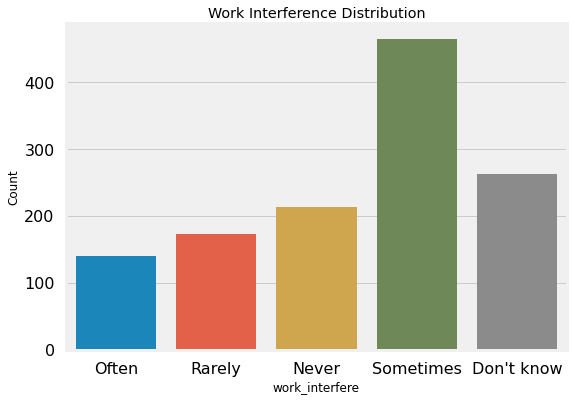

In [0]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data['work_interfere'].dropna(),ax=ax)
plt.title('Work Interference Distribution')
plt.ylabel('Count')
plt.show();

For most of the employees mental health largely affects their work life.

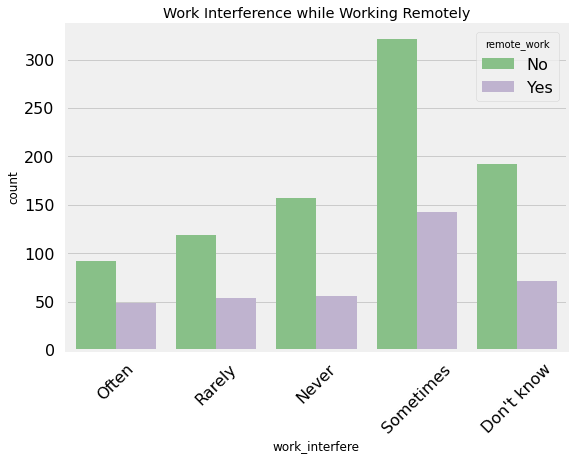

In [0]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = data,x = 'work_interfere', hue ='remote_work',ax=ax, palette="Accent")
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('Work Interference while Working Remotely')
plt.show();

Remote work seems to remove the effect of mental health issues affecting work. It maybe because employees working from home or other place of their choice have more control over their mental space. 

### 3.2.5 Which Age is Most Affected from Mental Health Issues?

In [0]:
#complete missing age with mean
data['Age'].fillna(data['Age'].median(), inplace = True)

# Fill with median() values < 18 and > 120
s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s

#Ranges of Age
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

### Encoding the Data for Further Use

In [0]:
#Encoding data
labelDict = {}
for feature in data: 
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])

    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] = labelValue

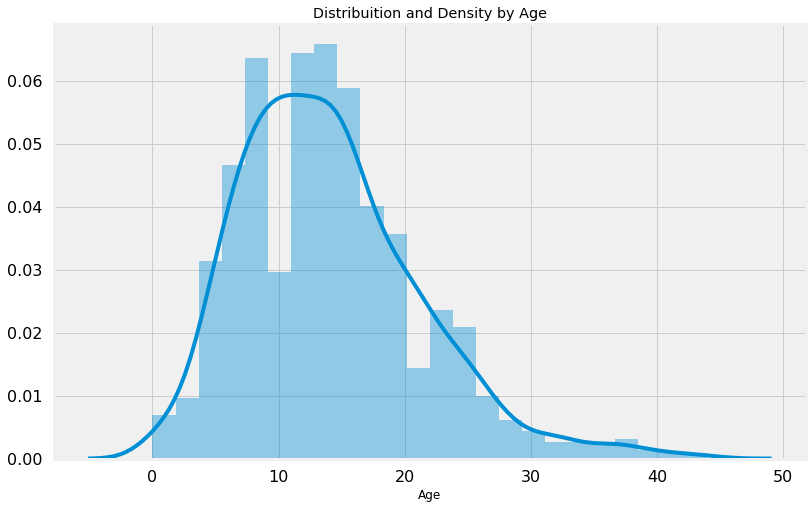

In [0]:
plt.figure(figsize=(12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribuition and Density by Age")
plt.xlabel("Age")
plt.show();

Individuals in their twenties are most likely to suffer from mental health issues.

In [0]:
# Scaling the Age variable since the range of its values is very different from other variables
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,2


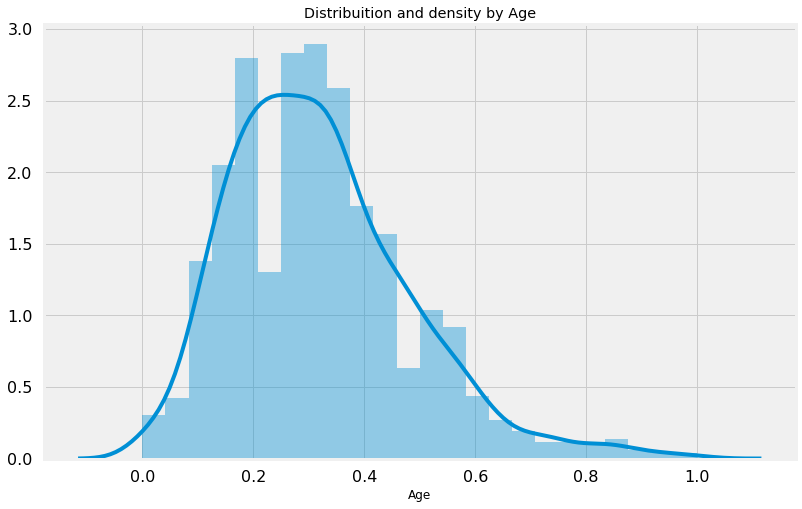

In [0]:
# After Scaling
plt.figure(figsize=(12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show();

### 3.2.6 Distribution of Probabilities of Different Factors Based on Individual's Gender

3.2.6.1 Treatment

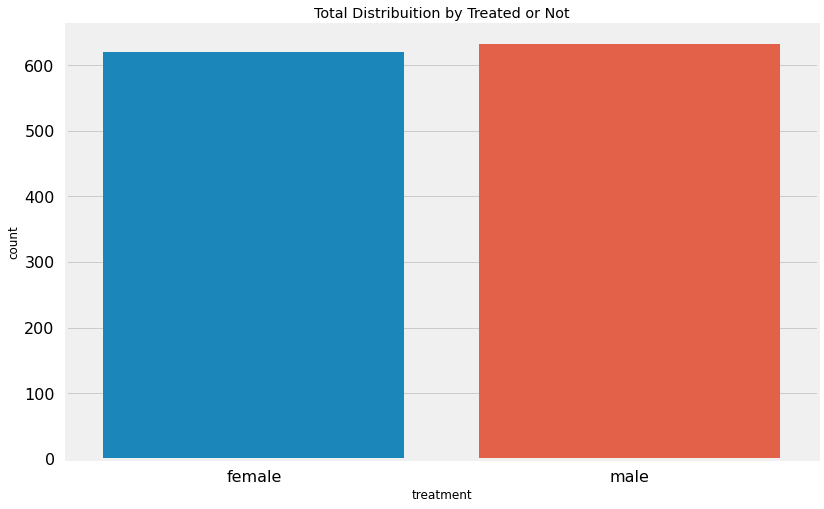

In [0]:
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
g = sns.countplot(x="treatment", data=data)
g.set_xticklabels(labels)

plt.title('Total Distribuition by Treated or Not');

Males are mostly likely to get treatment for mental health.

3.2.6.2 Age groups

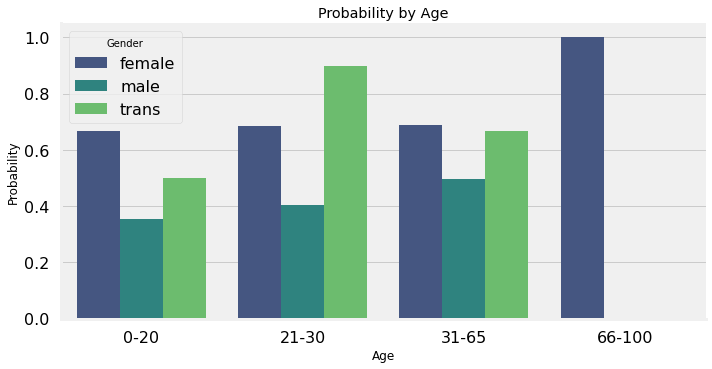

In [0]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", 
                data=data, kind="bar",  ci=None, height=5, aspect=2, legend_out = False, palette = 'viridis')
g.set_xticklabels(o)

plt.title('Probability by Age')
plt.ylabel('Probability')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show();

Mostly Transgenders in age group 21-30 as well as other groups are facing mental health issues in workplace. There seems to be an outlier in age range 66-100 for females with probability 1.

3.2.6.3 Family History

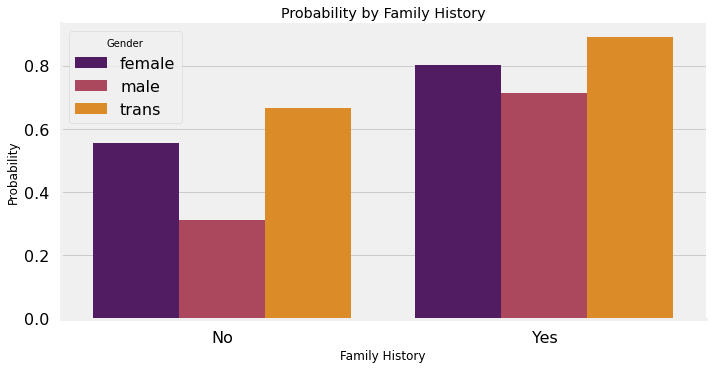

In [0]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", 
                data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = False, palette='inferno')
g.set_xticklabels(o)
plt.title('Probability by Family History')
plt.ylabel('Probability')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show();

Again transgenders with family history of mental issues seems to be affected.

3.2.6.4 Care Options

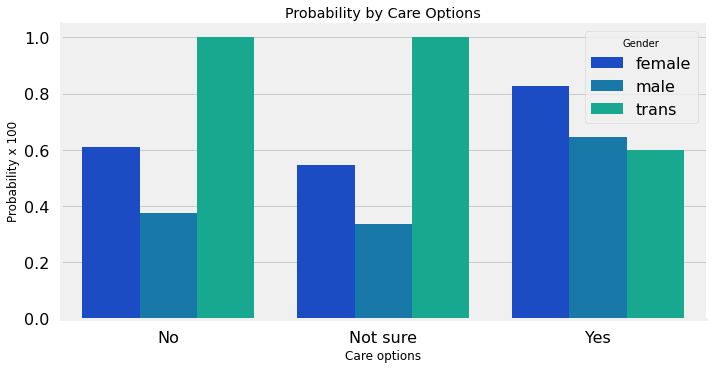

In [0]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", 
                data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = False, palette = 'winter')
g.set_xticklabels(o)
plt.title('Probability by Care Options')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show();

There seems to be a stark contrast among transgenders and others in availability and awareness of care options in workplace.

3.2.6.5 Benefits

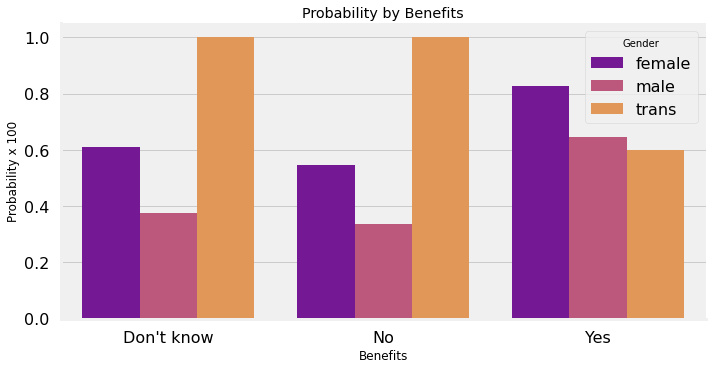

In [0]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", 
                data=data, kind="bar", ci=None, height=5, aspect=2, legend_out = False, palette='plasma')
g.set_xticklabels(o)
plt.title('Probability by Benefits')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show();

Benefits for transgenders seems to be much less available.

### 3.2.7 Correlation Matrix

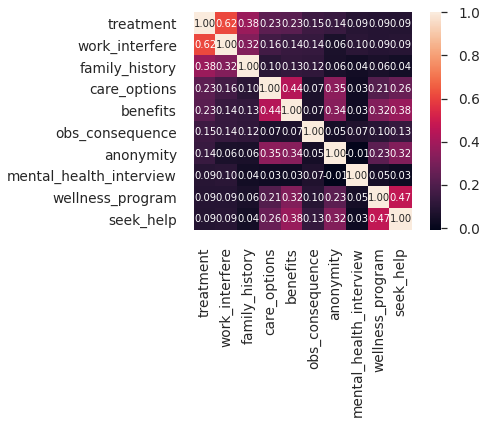

In [0]:
# correlation matrix with tratment as target variable
corrmat = data.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
# Copying encoded data for modelling
data_encoded = data.copy()

# Saving to csv file
data_encoded.to_csv('data_for_modelling.csv', index=False)



---

